# *1.Predicting Employee Attrition*

## **1.1 Data Cleaning**

In [ ]:
import pandas as pd

df=pd.read_csv("/content/Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.duplicated().sum()

np.int64(0)

## **1.2 EDA-(Univarient,Bivareint)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Attrition"]=le.fit_transform(df["Attrition"])

In [ ]:
df.groupby('BusinessTravel')['Attrition'].sum()

,Attrition
BusinessTravel,
Non-Travel,12
Travel_Frequently,69
Travel_Rarely,156


In [ ]:
df.groupby('Department')['Attrition'].sum()

,Attrition
Department,
Human Resources,12
Research & Development,133
Sales,92


In [ ]:
df.groupby('EducationField')['Attrition'].sum()

,Attrition
EducationField,
Human Resources,7
Life Sciences,89
Marketing,35
Medical,63
Other,11
Technical Degree,32


In [ ]:
df.groupby('MaritalStatus')['Attrition'].sum()

,Attrition
MaritalStatus,
Divorced,33
Married,84
Single,120


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
round(df.describe(),2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,0.16,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,0.37,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,0.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,0.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,0.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,0.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
!pip install ydata-profiling

  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

## **1.3 Data Preprocessing**

**Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer


ord=OrdinalEncoder(categories=[['Non-Travel','Travel_Frequently','Travel_Rarely']])
df['BusinessTravel']=ord.fit_transform(df[['BusinessTravel']])
ord=OrdinalEncoder(categories=[['Human Resources','Sales','Research & Development']])
df['Department']=ord.fit_transform(df[['Department']])
ord=OrdinalEncoder(categories=[['Human Resources','Other','Technical Degree','Marketing','Medical','Life Sciences']])
df['EducationField']=ord.fit_transform(df[['EducationField']])
ord=OrdinalEncoder(categories=[['Divorced','Married','Single']])
df["MaritalStatus"]=ord.fit_transform(df[["MaritalStatus"]])


In [ ]:
le=LabelEncoder()
df["OverTime"]=le.fit_transform(df["OverTime"])
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df['Over18'].value_counts()

,count
Over18,
Y,1470


In [ ]:
df.drop(['Over18'],axis=1,inplace=True)

In [ ]:
df.drop(['JobRole'],axis=1,inplace=True)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,1.0,1,2,5.0,1,1,2,0,94,3,2,4,2.0,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2.0,8,1,5.0,1,2,3,1,61,2,2,2,1.0,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,2.0,2,2,1.0,1,4,4,1,92,2,1,3,2.0,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2.0,3,4,5.0,1,5,4,0,56,3,1,3,1.0,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,2.0,2,1,4.0,1,7,1,1,40,3,1,2,1.0,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

## **1.4 Feature Selection**

In [ ]:
cor=df.corr()
cor['Attrition'].sort_values(ascending=False)

,Attrition
Attrition,1.000000
OverTime,0.246118
MaritalStatus,0.162070
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
Gender,0.029453
MonthlyRate,0.015170
PerformanceRating,0.002889
BusinessTravel,0.000074
HourlyRate,-0.006846


In [ ]:
x=df[['OverTime','MaritalStatus','NumCompaniesWorked','Gender','Department','JobSatisfaction','JobInvolvement','YearsAtCompany','Age','MonthlyIncome','TotalWorkingYears']]
y=df['Attrition']

In [ ]:
df_new=pd.concat([x,y],axis=1)


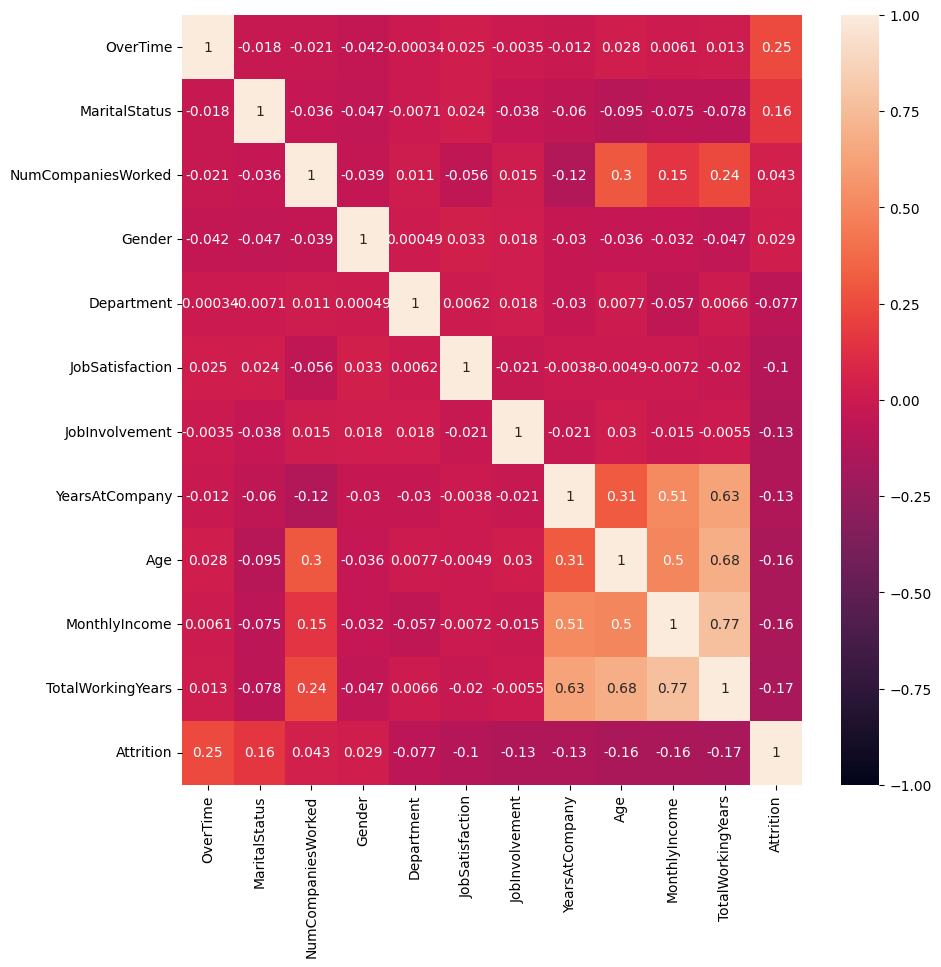

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

## **1.5 Balancing a Imbalanced Data**

In [ ]:
df_new['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x_res,y_res=sm.fit_resample(x,y)

In [ ]:
y_res.value_counts()

,count
Attrition,
1,1233
0,1233


## **1.6 Applying Scaler Technique**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_res=sc.fit_transform(x_res)

## **1.7 Finding a Best Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**1.Logistic Regression**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

best_score=0
for i in range(42):
  x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=i)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)
  score=lr.score(x_test,y_test)

  if score > best_score:
      best_score=score
      best_rs=i
print(f'ran:{best_rs},score:{best_score}')

ran:32,score:0.7813765182186235


**Evaluation Metrics**

Accuracy Score: 0.7226720647773279
Precision Score: 0.7410358565737052
Recall Score: 0.7209302325581395
F1 Score: 0.730844793713163
Confusion Matrix: 
[[171  65]
 [ 72 186]]
AUC: 0.8143805019051373


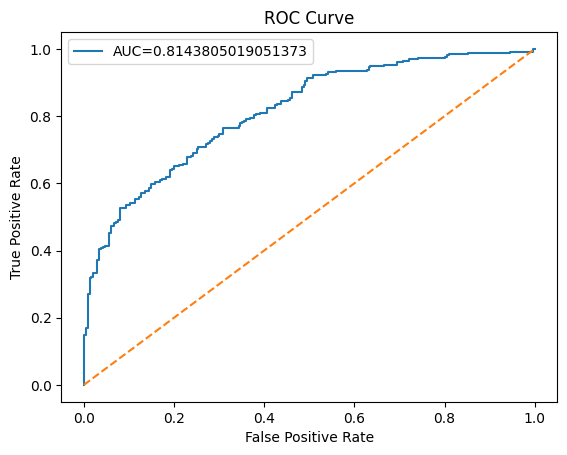

In [ ]:
from sklearn.metrics import *
cm=confusion_matrix(y_test,lr.predict(x_test))
ac=accuracy_score(y_test,lr.predict(x_test))
pr=precision_score(y_test,lr.predict(x_test))
re=recall_score(y_test,lr.predict(x_test))
f1=f1_score(y_test,lr.predict(x_test))
auc=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**2.Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=i)
  dt=DecisionTreeClassifier(max_depth=10)
  dt.fit(x_train,y_train)
  score=dt.score(x_test,y_test)

  if score > best_score:
      best_score=score
      best_rs=i
print(f'ran:{best_rs},score:{best_score}')

ran:24,score:0.8765182186234818


**Evaluation Metrics**

Accuracy Score: 0.8360323886639676
Precision Score: 0.8326530612244898
Recall Score: 0.8360655737704918
F1 Score: 0.8343558282208589
Confusion Matrix: 
[[209  41]
 [ 40 204]]
AUC: 0.8678360655737704


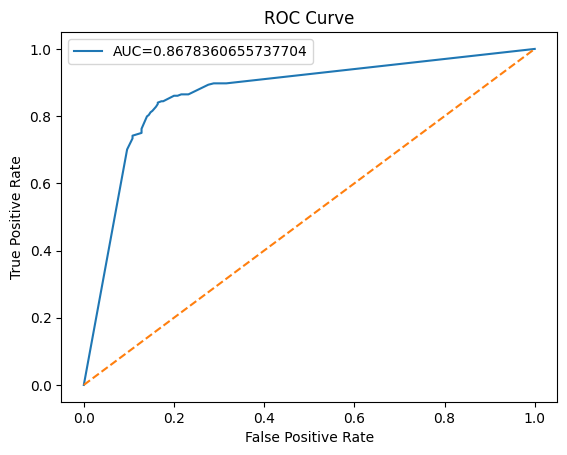

In [ ]:
from sklearn.metrics import *
cm=confusion_matrix(y_test,dt.predict(x_test))
ac=accuracy_score(y_test,dt.predict(x_test))
pr=precision_score(y_test,dt.predict(x_test))
re=recall_score(y_test,dt.predict(x_test))
f1=f1_score(y_test,dt.predict(x_test))
auc=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **1.8 Ensemble Moduls-(Bagging and Boosting)**

**1.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=i)
  rd=RandomForestClassifier(max_depth=10)
  rd.fit(x_train,y_train)
  score=rd.score(x_test,y_test)

  if score > best_score:
      best_score=score
      best_rs=i
print(f'ran:{best_rs},score:{best_score}')

ran:25,score:0.9149797570850202


**Evaluation Metrics**

Accuracy Score: 0.8360323886639676
Precision Score: 0.8326530612244898
Recall Score: 0.8360655737704918
F1 Score: 0.8343558282208589
Confusion Matrix: 
[[209  41]
 [ 40 204]]
AUC: 0.8678360655737704


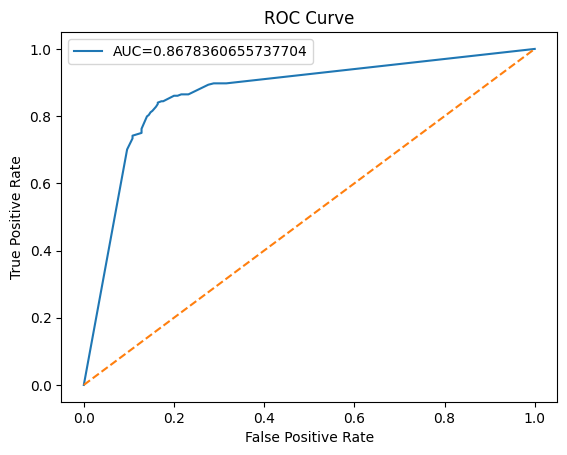

In [ ]:
cm=confusion_matrix(y_test,dt.predict(x_test))
ac=accuracy_score(y_test,dt.predict(x_test))
pr=precision_score(y_test,dt.predict(x_test))
re=recall_score(y_test,dt.predict(x_test))
f1=f1_score(y_test,dt.predict(x_test))
auc=roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=dt.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**2.Light Gradient Boost Module**

In [ ]:
import lightgbm as lgb

best_score=0
for i in range(0,43):
  x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=i)
  lg=lgb.LGBMClassifier(n_estimator=10,max_depth=10)
  lg.fit(x_train,y_train)
  score=rd.score(x_test,y_test)

  if score > best_score:
      best_score=score
      best_rs=i
print(f'ran:{best_rs},score:{best_score}')

**Evaluation Metrics**

In [ ]:
cm=confusion_matrix(y_test,lg.predict(x_test))
ac=accuracy_score(y_test,lg.predict(x_test))
pr=precision_score(y_test,lg.predict(x_test))
re=recall_score(y_test,lg.predict(x_test))
f1=f1_score(y_test,lg.predict(x_test))
auc=roc_auc_score(y_test,lg.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=dt.predict_proba(x_test)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **1.9 Hyper Parameter Tunning (Selected Module-LightGBM)**

In [ ]:
models={'lightGB':{'model':lgb.LGBMClassifier(),
                    'params':{'n_estimator':[10,20,30,40,50,60,70,80,90,100],'max_depth':[1,2,3,4,5,6,7,8,9,10]}}}

In [ ]:
from sklearn.model_selection import GridSearchCV
score=[]

for name,config in models.items():
  gs=GridSearchCV(config['model'],config['params'],cv=5,scoring='accuracy')
  gs.fit(x_train,y_train)

  best_model = gs.best_estimator_ #it will give you best parameter
  print(best_model)
  y_pred = best_model.predict(x_test)

  cm=confusion_matrix(y_test,lg.predict(x_test))
  ac=accuracy_score(y_test,lg.predict(x_test))
  pr=precision_score(y_test,lg.predict(x_test))
  re=recall_score(y_test,lg.predict(x_test))
  f1=f1_score(y_test,lg.predict(x_test))
  auc=roc_auc_score(y_test,lg.predict_proba(x_test)[:,1])

  score.append({
      'model':name,
      'best_score':gs.best_score_,
      'best_params':gs.best_params_,
      'accuracy_score':ac,
      'precision_score':pr,
      'recall_score':re,
      'f1_score':f1,
      'confusion_matrix':cm,
      'auc':auc
  })



In [ ]:
score

In [ ]:
score=pd.DataFrame(score)

In [ ]:
score

## **1.10 Final Model**

In [ ]:
x_train_f,x_test_f,y_train_f,y_test_f=train_test_split(x_res,y_res,test_size=0.2,random_state=27)
LG=lgb.LGBMClassifier(max_depth=6,n_estimator=10)
LG.fit(x_train_f,y_train_f)

In [ ]:
LG.score(x_test_f,y_test_f)

[LightGBM] [Warning] Unknown parameter: n_estimator


0.9048582995951417

**Evaluation Metrics**

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
Accuracy Score: 0.9048582995951417
Precision Score: 0.9217391304347826
Recall Score: 0.8796680497925311
F1 Score: 0.9002123142250531
Confusion Matrix: 
[[235  18]
 [ 29 212]]
AUC: 0.9635084381611533
[LightGBM] [Warning] Unknown parameter: n_estimator


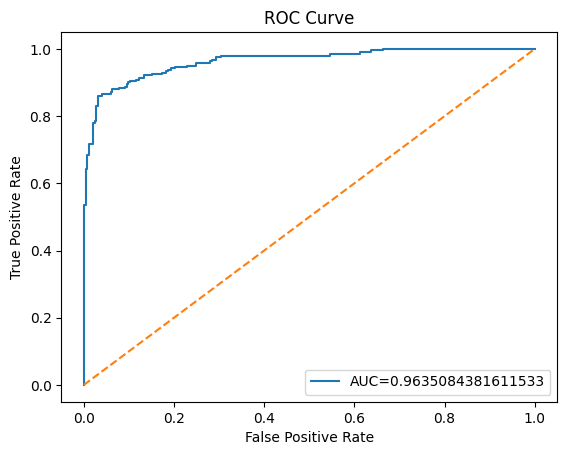

In [ ]:
cm=confusion_matrix(y_test_f,LG.predict(x_test_f))
ac=accuracy_score(y_test_f,LG.predict(x_test_f))
pr=precision_score(y_test_f,LG.predict(x_test_f))
re=recall_score(y_test_f,LG.predict(x_test_f))
f1=f1_score(y_test_f,LG.predict(x_test_f))
auc=roc_auc_score(y_test_f,LG.predict_proba(x_test_f)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=LG.predict_proba(x_test_f)[:,1]

fpr,tpr,threshold=roc_curve(y_test_f,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **1.11 Save The Model**

In [ ]:
!pip install joblib

In [ ]:
from joblib import dump,load

dump(LG,'model.joblib')



['model.joblib']

# *2.Predicting Performance Rating*

## **1.Data Preprocessing**

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,1.0,1,2,5.0,1,1,2,0,94,3,2,4,2.0,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,2.0,8,1,5.0,1,2,3,1,61,2,2,2,1.0,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,2.0,2,2,1.0,1,4,4,1,92,2,1,3,2.0,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,2.0,3,4,5.0,1,5,4,0,56,3,1,3,1.0,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,2.0,2,1,4.0,1,7,1,1,40,3,1,2,1.0,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
lab=LabelEncoder()
df['PerformanceRating']=lab.fit_transform(df['PerformanceRating'])

## **2.Feature Selection**

In [ ]:
cor=df.corr()
cor['PerformanceRating'].sort_values(ascending=False)

In [ ]:
x=df[['PercentSalaryHike','YearsInCurrentRole','Department','YearsSinceLastPromotion','TotalWorkingYears','OverTime','Gender','RelationshipSatisfaction',
     'EnvironmentSatisfaction','JobInvolvement','BusinessTravel']]
y=df['PerformanceRating']

In [ ]:
x.head()

,PercentSalaryHike,YearsInCurrentRole,Department,YearsSinceLastPromotion,TotalWorkingYears,OverTime,Gender,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,BusinessTravel
0,11,4,1.0,0,8,1,0,1,2,3,2.0
1,23,7,2.0,1,10,0,1,4,3,2,1.0
2,15,0,2.0,0,7,1,1,2,4,2,2.0
3,11,7,2.0,3,8,1,0,3,4,3,1.0
4,12,2,2.0,2,6,0,1,4,1,3,2.0


In [ ]:
y.head()

,PerformanceRating
0,0
1,1
2,0
3,0
4,0


In [ ]:
y.value_counts()

,count
PerformanceRating,
0,1244
1,226


In [ ]:
x_res_1,y_res_1=sm.fit_resample(x,y)

In [ ]:
y_res_1.value_counts()

,count
PerformanceRating,
0,1244
1,1244


## **3.Model Built**

In [ ]:
# I choose this model because of performing very well in evalution Metrics
#1.logistic Reg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

best_score=0
for i in range(42):
  x_train,x_test,y_train,y_test=train_test_split(x_res_1,y_res_1,test_size=0.2,random_state=i)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)
  score=lr.score(x_test,y_test)

  if score > best_score:
      best_score=score
      best_rs=i
print(f'ran:{best_rs},score:{best_score}')

ran:0,score:1.0


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[242   0]
 [  0 256]]
AUC: 1.0


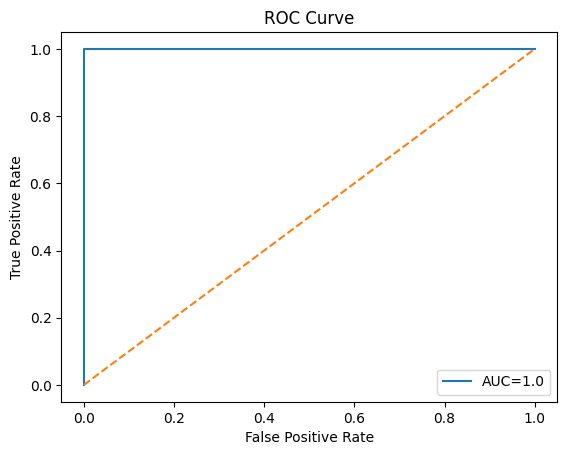

In [ ]:
from sklearn.metrics import *
cm=confusion_matrix(y_test,lr.predict(x_test))
ac=accuracy_score(y_test,lr.predict(x_test))
pr=precision_score(y_test,lr.predict(x_test))
re=recall_score(y_test,lr.predict(x_test))
f1=f1_score(y_test,lr.predict(x_test))
auc=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

print(f'Accuracy Score: {ac}')
print(f'Precision Score: {pr}')
print(f'Recall Score: {re}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix: \n{cm}')
print(f'AUC: {auc}')

import matplotlib.pyplot as plt

y_hat=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_hat)

plt.plot(fpr,tpr,label=f'AUC={auc}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **4.Save the Model**

In [ ]:
from joblib import dump,load

dump(lr,'model_2.joblib')

['model_2.joblib']

In [ ]:
dump(lab,'enc_model_2.joblib')

['enc_model_2.joblib']

## **5.Test the Prediction**

In [ ]:
x_test.head()

,PercentSalaryHike,YearsInCurrentRole,Department,YearsSinceLastPromotion,TotalWorkingYears,OverTime,Gender,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,BusinessTravel
1990,21,0,1.717413,0,1,0,0,1,1,2,1.717413
723,13,7,2.000000,0,13,0,1,2,4,3,2.000000
1589,24,10,1.742301,7,14,0,1,1,3,1,1.484601
1514,20,6,1.000000,7,7,0,0,2,1,3,1.272912
580,16,2,1.000000,0,3,0,0,2,1,3,2.000000


In [ ]:
y_test.head()

,PerformanceRating
1990,1
723,0
1589,1
1514,1
580,0


In [ ]:
lr.predict([[21, 0, 1.717413, 0, 1, 0, 0, 1, 1, 2, 1.717413]])

array([1])